<a href="https://colab.research.google.com/github/eshnil2000/google-colab/blob/master/neural_net_home_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Install and import all required modules
%%capture
import warnings
warnings.simplefilter('ignore')
!pip install sklearn matplotlib tensorflow keras pandas
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
!git clone https://github.com/eshnil2000/google-colab
%cd google-colab

In [41]:
#Visualize the data
df = pd.read_csv('data/housepricedata.csv')
df


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


In [0]:
#extract data as array
dataset = df.values
#Split data into input (X) features and output Label (Y)
X = dataset[:,0:10]
Y = dataset[:,10]

In [0]:
#Normalizethe data to be between 0 & 1
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [44]:
#Split data into training, testing and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


#Build & Train Neural Network with Keras

In [0]:
#Import required modules
from keras.models import Sequential
from keras.layers import Dense

In [46]:
#Define the model, 3 layers
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
#View our model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Optimize the model, use pre-defined loss function, track accuracy
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [48]:
#Train the model using training data, feed data in batches of 32 points, train it 100 times over, validate with validation data
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 302us/step - loss: 0.7237 - acc: 0.4892 - val_loss: 0.7074 - val_acc: 0.5479
Epoch 2/100
1022/1022 [==============================] - 0s 42us/step - loss: 0.7122 - acc: 0.4892 - val_loss: 0.7014 - val_acc: 0.5479
Epoch 3/100
1022/1022 [==============================] - 0s 39us/step - loss: 0.7048 - acc: 0.4883 - val_loss: 0.6981 - val_acc: 0.5479
Epoch 4/100
1022/1022 [==============================] - 0s 41us/step - loss: 0.7002 - acc: 0.4873 - val_loss: 0.6960 - val_acc: 0.5434
Epoch 5/100
1022/1022 [==============================] - 0s 43us/step - loss: 0.6967 - acc: 0.4990 - val_loss: 0.6943 - val_acc: 0.5525
Epoch 6/100
1022/1022 [==============================] - 0s 41us/step - loss: 0.6939 - acc: 0.5460 - val_loss: 0.6929 - val_acc: 0.5845
Epoch 7/100
1022/1022 [==============================] - 0s 43us/step - loss: 0.6916 - acc: 0.5372 - val_loss: 0.6917 - val_acc: 0.5342


In [49]:
#Evaluate on test dataset
result=model.evaluate(X_test, Y_test)

result

219/219 [==============================] - 0s 49us/step


[0.3417704309502693, 0.8310502307600083]

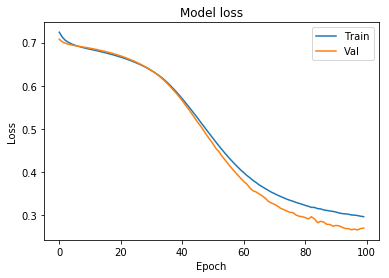

In [50]:
#Plot training & validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

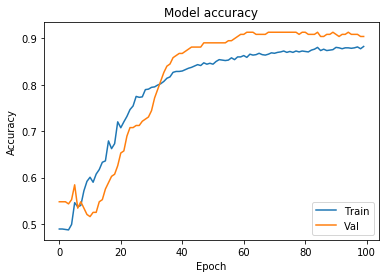

In [51]:
#Plot accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()